# Situación Problema - Calidad de Vinos

En la siguiente base de datos se mostrara una serie de datos que estan relacionados con las variantes rojas del vino portugués "Vinho Verde". 

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

## 1. ¿Cuál es la variable de interés a pronosticar?, ¿Qué se esperalograr con este proyecto?

In [2]:
df = pd.read_csv('winequality-red.csv')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


#### Conclusiones 
La variable de interés a pronosticar es 'quality', la cual describe el puntaje de calidad de algunas variantes de vino rojo portuges en función de distintos factores como lo son: citric acid, density, pH y alcohol, entre otras. Con este proyecto se espera diseñar un modelo de regresión simple en el que se pueda ingresar los datos de algun nuevo vino y pronosticar su calidad.

## 2. ¿Cuántas variables hay y de qué tipos son?, ¿Por qué esimportante conocer esta información?

In [3]:
df.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


#### Conclusiones 
Lo primero que comenzaremos a analizar de la base de datos, es la dimensión de la misma. Podemos observar que cuenta con una cantidad de 11 variables y 1599 observaciones, donde la mayoria resulta ser del tipo float y solo 1 de tipo int. Este ultimo dato es muy importante, ya que para poder hacer un modelo de regresion, necesitamos variables del tipo float. Como podemos notar, aparentemente quality es considerado como int, sin embargo, esto considera porque la mayoria de sus variables estan entre 5 y 6, esto lo podremos comprobar mas adelante con un historgama, ademas de que podremos ver como considera los demas datos distintos a estos numeros como datos atipicos dentro de un boxplot.

## 3 ¿Qué distribución sigue la variable de interés ('quality')?

In [4]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


#### Conclusiones
al observar mi variable de interes, puedo notar a traves de la información que se me da en mínimos y máximos, que el rango de datos que hay va de 3 como minimo a 8, sin embargo, al leer el contexto de la base de datos se que este dato de 'quality' tiene un rango de 0 a 10, sin embargo del listado de vinos dado ninguno ha sido calificado con una calidad de 0 o 10. Por lo tanto en este rango sera donde encontraremos nuestro pronóstico de regresión. 

In [5]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

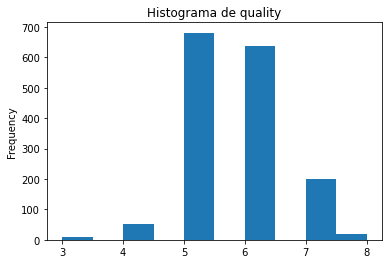

In [6]:
histogram = df['quality'].plot(kind='hist',
                              title='Histograma de quality')

## Conclusiones
Se observa que tiende a una distribución relativamente noraml, ya que se puede notar la forma de campana ligeramente recargada a la derecha, sin embargo, no presenta una asimetría perfecta.

## 5. ¿Cuál es la variable de mayor correlación con lavariable de interés (quality)?

A continuación, analizaremos todas las variables para concer cual es la de mayor interés o mayor influencia para el modelo.

In [7]:
df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


## Conclusiones

Podemos observar que existe una variable que denota un número no tan cercano a 1, si no que es el mayor de todas las variables en correlacion con la variable de interes 'quality', esta es "alcohol", con una correlacion de 0.4761, la
cual será la mejor opción para construir una función de regresión de la siguiente manera:
quality = B0 + B1 * alcohol

## 6. ¿Cómo es la correlación existente entre la variable independiente 'alcohol' y la variable dependiente'quality'?

Text(0.5, 1.0, 'Scatter plot of Alcohol vs Quality')

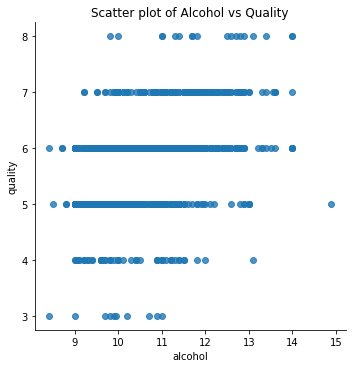

In [8]:
sns.lmplot(x = 'alcohol',
          y = 'quality',
          data = df,
          fit_reg = False,
          )
plt.title('Scatter plot of Alcohol vs Quality')

## Conclusiones

## 7.  ¿Existen valores atípicos en la variable independiente'alcohol'?

Conocer este dato es de gran importancia ya que se debe mantener la confiabilidad del pronóstico.

Text(0.5, 1.0, 'Datos atípicos en Alcohol')

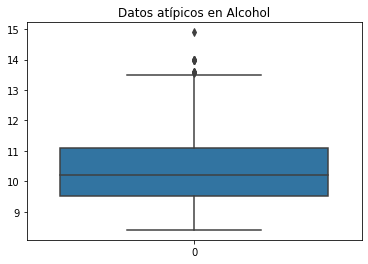

In [9]:
sns.boxplot(data=df['alcohol'])
plt.title('Datos atípicos en Alcohol')

## Conclusiones

Podemos observar que existen 3 valors atípicos, sin embargo, la correlación de la varible alcohol con quality, sigue manteniendo un nivel moderado, por lo que podemos seguir con nuestro análisis y proceder al análisis de regresión.

## 8. ¿Qué tan bueno es el análisis de regresión para 'quality'en función de 'alcohols'?, ¿Qué indica la R-cuadrada?, ¿y los P-value de los parámetros B0 y B1?,¿el Durbir-Watson?

In [10]:
model = sm.OLS.from_formula ('quality ~ alcohol',
                            data = df)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.227
Model:                            OLS   Adj. R-squared:                  0.226
Method:                 Least Squares   F-statistic:                     468.3
Date:                Thu, 21 Oct 2021   Prob (F-statistic):           2.83e-91
Time:                        06:54:53   Log-Likelihood:                -1721.1
No. Observations:                1599   AIC:                             3446.
Df Residuals:                    1597   BIC:                             3457.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.8750      0.175     10.732      0.000       1.532       2.218
alcohol        0.3608      0.017     21.639      0.000       0.328       0.394
==============================================================================
Omnibus:                       38.501   Durbin-Watson:                   1.748
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               71.758
Skew:                          -0.154   Prob(JB):                     2.62e-16
Kurtosis:                       3.991   Cond. No.                         104.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Conclusiones

Podemos observar en el modelo, que los parámetros B0 y B1 son significativos, debido a que se encuentran por debajo del (alfa = 0.05), lo cual implica que se está manejando un buen modelo. En un análisis más detallado, el Durbin-Watson tiene un valor muy cercano a 2, lo cual también refiere a un modelo bueno para la independencia de los residuos y muestra una evidencia de correlación positiva. Además, el valor de R cuadrada es muy bajo, proponiendo que el modelo no tiene un buen ajuste y muchas de las muestras no siguen la linea de tendencia.

## 9. ¿Cómo se vería nuevamente la gráfica de dispersión de las observaciones con la gráfica de regresión propuesta por el modelo?, ¿Qué se puede concluir apartir de ello?

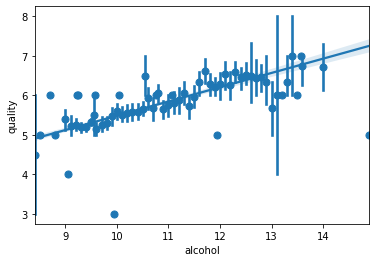

In [11]:
ax = sns.regplot(x = 'alcohol',
                y = 'quality',
                data = df,
                 x_estimator = np.mean)

## Conclusiones

Para finalizar graficamos el pronóstico de regresión, en donde podemos observar que se ajusta de una buena manera para conocer el nivel de calidad de un vino en función de la cantidad de alcohol que contenga. Podemos decir que logramos lo cometido en este proyecto, el cual consistia en que, con este nuevo modelo de pronóstico, podamos ingresas las métricas de cualquier vino y estimar si este sera de muy buena calidad dentro de la industria de los vinos, en espcial hablando de las variantes rojas del vino portugués "Vinho Verde"